# Data Loading

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
import statsmodels.formula.api as sml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score
from functools import reduce
from sklearn.metrics import silhouette_score
from scipy.interpolate import UnivariateSpline
sns.set_style("whitegrid") 

In [3]:
supplemental = pd.read_csv("../Data/supplemental_clinical_data.csv")


## Removing Patients With Missing UPDRS I-II-III Scores After Month 0 

In [4]:
after_mon0 = supplemental[supplemental['visit_month'] > 0]

In [5]:
after_mon0.shape

(1452, 8)

In [6]:
count = supplemental['visit_month'].value_counts()[0]
print (count)

771


In [7]:
follow = after_mon0.dropna(subset=['updrs_1','updrs_2','updrs_3'], how = 'any')
follow.shape

(1330, 8)

In [10]:
patients_follow = follow['patient_id'].unique() 
supplemental_follow= supplemental[supplemental['patient_id'].isin(patients_follow)]
supplemental_follow.shape

(1839, 8)

## Making a 50-50 Train Test Split

In [12]:
supplemental_follow_train, supplemental_follow_test  = train_test_split( supplemental_follow, test_size=0.5, random_state= 112)
supplemental_follow_train.shape

(919, 8)

## Pivoting Each Of The UPDR Scores  

<Figure size 1000x600 with 0 Axes>

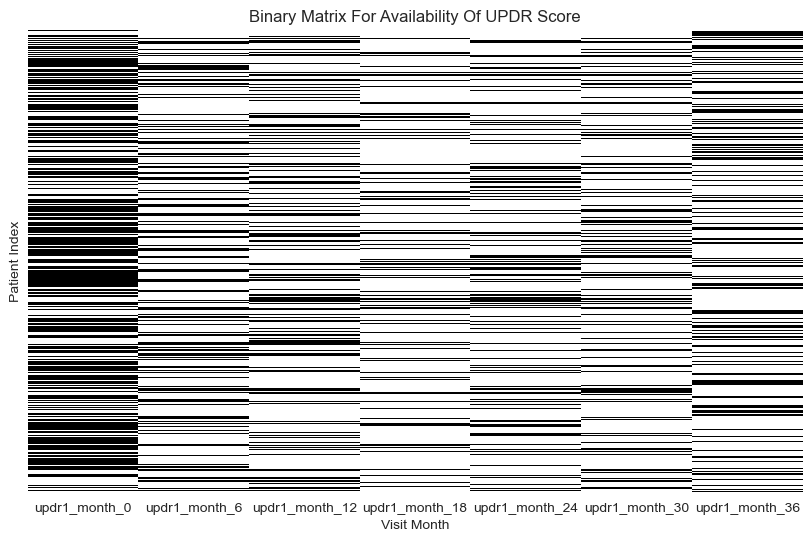

In [13]:
supplemental_updrs1_prelim = supplemental_follow_train[[ 'patient_id', 'visit_month', 'updrs_1' ]].copy()
supplemental_updrs1 = supplemental_updrs1_prelim.pivot(index = 'patient_id', columns = 'visit_month', values = 'updrs_1' )
supplemental_updrs1.columns = [f'updr1_month_{col}' for col in supplemental_updrs1.columns]
plt.figure(figsize=(10, 6))

binary_matrix = supplemental_updrs1[supplemental_updrs1.columns].notna().astype(int)
binary_matrix.shape

plt.figure(figsize=(10, 6))
sns.heatmap(binary_matrix, cmap='Greys', cbar=False)
plt.xlabel('Visit Month')
plt.ylabel('Patient Index')
plt.title('Binary Matrix For Availability Of UPDR Score')
plt.yticks([],[])  # Set x-axis ticks to actual visit months
plt.grid(True)
plt.show()

In [14]:
supplemental_updrs1.head()

,updr1_month_0,updr1_month_6,updr1_month_12,updr1_month_18,updr1_month_24,updr1_month_30,updr1_month_36
patient_id,,,,,,,
35,5.0,NaN,NaN,NaN,NaN,NaN,NaN
75,NaN,NaN,NaN,NaN,NaN,NaN,1.0
337,NaN,NaN,NaN,NaN,NaN,NaN,8.0
527,NaN,NaN,NaN,NaN,NaN,NaN,2.0
557,5.0,NaN,NaN,NaN,NaN,NaN,6.0


<Figure size 1000x600 with 0 Axes>

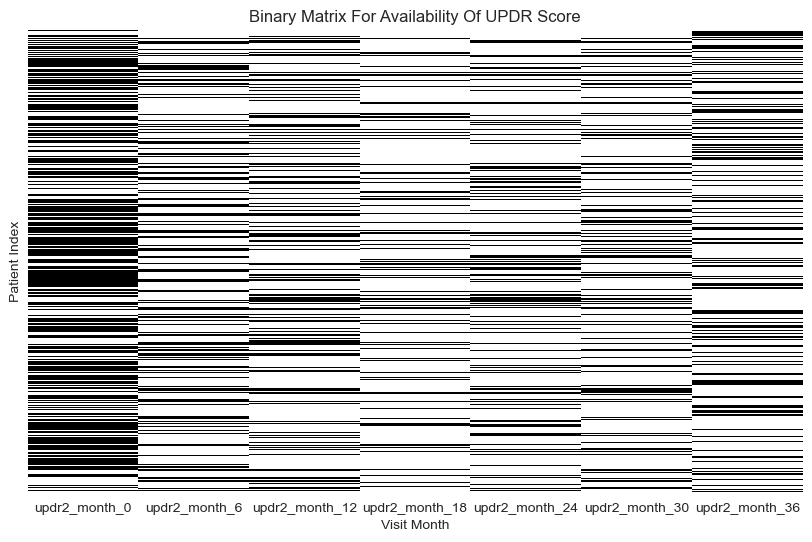

In [15]:
supplemental_updrs2_prelim = supplemental_follow_train[[ 'patient_id', 'visit_month', 'updrs_2' ]].copy()
supplemental_updrs2 = supplemental_updrs2_prelim.pivot(index = 'patient_id', columns = 'visit_month', values = 'updrs_2' )
supplemental_updrs2.columns = [f'updr2_month_{col}' for col in supplemental_updrs2.columns]
plt.figure(figsize=(10, 6))

binary_matrix = supplemental_updrs2[supplemental_updrs2.columns].notna().astype(int)
binary_matrix.shape

plt.figure(figsize=(10, 6))
sns.heatmap(binary_matrix, cmap='Greys', cbar=False)
plt.xlabel('Visit Month')
plt.ylabel('Patient Index')
plt.title('Binary Matrix For Availability Of UPDR Score')
plt.yticks([],[])  # Set x-axis ticks to actual visit months
plt.grid(True)
plt.show()


<Figure size 1000x600 with 0 Axes>

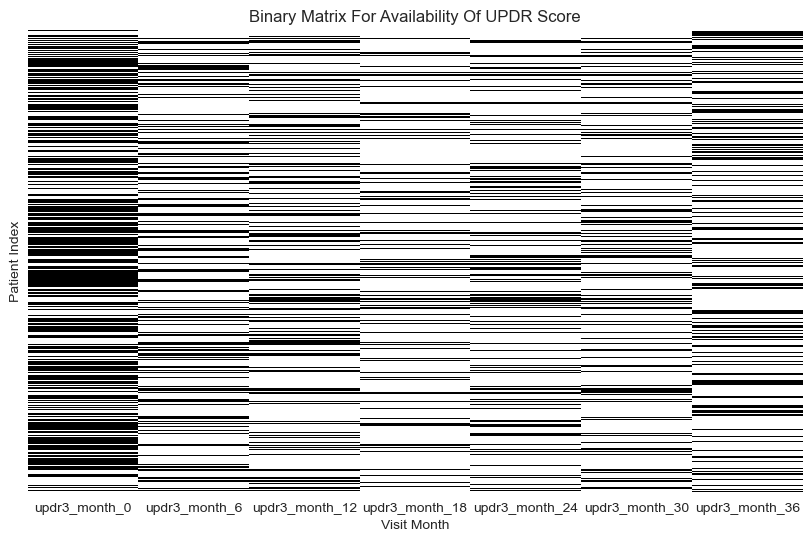

In [16]:

supplemental_updrs3_prelim = supplemental_follow_train[[ 'patient_id', 'visit_month', 'updrs_3' ]].copy()
supplemental_updrs3 = supplemental_updrs3_prelim.pivot(index = 'patient_id', columns = 'visit_month', values = 'updrs_3' )
supplemental_updrs3.columns = [f'updr3_month_{col}' for col in supplemental_updrs3.columns]
plt.figure(figsize=(10, 6))

binary_matrix = supplemental_updrs3[supplemental_updrs3.columns].notna().astype(int)
binary_matrix.shape

plt.figure(figsize=(10, 6))
sns.heatmap(binary_matrix, cmap='Greys', cbar=False)
plt.xlabel('Visit Month')
plt.ylabel('Patient Index')
plt.title('Binary Matrix For Availability Of UPDR Score')
plt.yticks([],[])  # Set x-axis ticks to actual visit months
plt.grid(True)
plt.show()


In [17]:
supplemental_new = pd.concat([supplemental_updrs1, supplemental_updrs2, supplemental_updrs3], axis=1)
visit_months = [0, 6, 12, 18, 24, 30, 36]

# Create the column order: [updrs1_0, updrs2_0, updrs3_0, updrs1_6, ..., updrs3_36]
visit_months = [0, 6, 12, 18, 24, 30, 36]  # or whatever you have
ordered_columns = []

# For each month, collect updrs1, updrs2, updrs3 from that month
for month in visit_months:
    for score in ['updr1', 'updr2', 'updr3']:
        col = f'{score}_month_{month}'
        if col in supplemental_new.columns:
            ordered_columns.append(col)
        else:
            print(f'Warning: Missing column {col}')

print(ordered_columns)



['updr1_month_0', 'updr2_month_0', 'updr3_month_0', 'updr1_month_6', 'updr2_month_6', 'updr3_month_6', 'updr1_month_12', 'updr2_month_12', 'updr3_month_12', 'updr1_month_18', 'updr2_month_18', 'updr3_month_18', 'updr1_month_24', 'updr2_month_24', 'updr3_month_24', 'updr1_month_30', 'updr2_month_30', 'updr3_month_30', 'updr1_month_36', 'updr2_month_36', 'updr3_month_36']


In [18]:
supplemental_new_ord = supplemental_new[ordered_columns].copy()
supplemental_new_ord.head()

,updr1_month_0,updr2_month_0,updr3_month_0,updr1_month_6,updr2_month_6,updr3_month_6,updr1_month_12,updr2_month_12,updr3_month_12,updr1_month_18,...,updr3_month_18,updr1_month_24,updr2_month_24,updr3_month_24,updr1_month_30,updr2_month_30,updr3_month_30,updr1_month_36,updr2_month_36,updr3_month_36
patient_id,,,,,,,,,,,,,,,,,,,,,
35,5.0,3.0,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,8.0,38.0
337,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,7.0,8.0
527,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,18.0,22.0
557,5.0,6.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,9.0,17.0


In [19]:
supplemental_follow_train.head()

,visit_id,patient_id,visit_month,updrs_1,updrs_2,updrs_3,updrs_4,upd23b_clinical_state_on_medication
1427,41234_0,41234,0,4.0,3.0,23.0,0.0,NaN
873,25924_24,25924,24,9.0,8.0,24.0,5.0,On
699,21526_6,21526,6,8.0,12.0,34.0,NaN,NaN
1806,52288_6,52288,6,6.0,7.0,51.0,NaN,NaN
716,22087_0,22087,0,8.0,4.0,15.0,NaN,NaN


In [20]:
updrs_scores = ['updrs_1' , 'updrs_2', 'updrs_3']
features = [] 
for score in updrs_scores:
    model_score = sml.ols(f'{score} ~ visit_month + C(patient_id)', data=supplemental_follow_train)
    result = model_score.fit()
    features_supp =  result.params.filter(like="C(patient_id)")
    features_supp = features_supp.reset_index()
    features_supp.columns = ['patient_id', f'{score}_features']
    features_supp['patient_id'] = features_supp['patient_id'].str.extract(r'C\(patient_id\)\[T\.(.*)\]')
    baseline_patient = set(supplemental_follow_train['patient_id'].astype(str)) - set(features_supp['patient_id'])
    features_supp = pd.concat([  pd.DataFrame({'patient_id': list(baseline_patient), f'{score}_features': 0}, ), features_supp
], ignore_index=True)
    features.append(features_supp)
feats_merged = features[0]
for f in features[1:]:
    feats_merged = feats_merged.merge(f, on='patient_id', how='inner')
print(feats_merged)




    patient_id  updrs_1_features  updrs_2_features  updrs_3_features
0           35          0.000000          0.000000          0.000000
1           75         -4.876613          4.605484         24.057159
2          337          2.123387          3.605484         -5.942841
3          527         -3.876613         14.605484          8.057159
4          557          0.061693          4.302742          4.528580
..         ...               ...               ...               ...
424      64721         -3.674238          2.179910         35.800006
425      64938         -1.188307          4.302742          6.028580
426      65006         20.123387         16.605484         17.057159
427      65290         -2.505679         10.134933          1.350005
428      65530          2.123387          0.605484          1.057159

[429 rows x 4 columns]


In [21]:
feature_cols = [col for col in feats_merged.columns if col != 'patient_id']
X = feats_merged[feature_cols].astype(float).values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [22]:
K = range(2,10)
inertias = []
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=25)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)
    labels = kmeans.labels_

c:\Users\sayan\anaconda3new\envs\erdos_summer_2025\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\sayan\anaconda3new\envs\erdos_summer_2025\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\sayan\anaconda3new\envs\erdos_summer_2025\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\sayan\anaconda3new\envs\erdos_summer_2025\Lib\sit

Text(0.5, 1.0, 'Elbow Method For Optimal k')

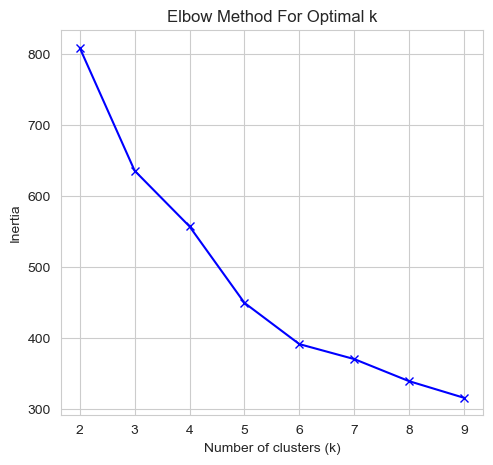

In [23]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(K, inertias, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')

In [24]:
CHscores_kmeans = []
K = range(2, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=25)
    labels = kmeans.fit_predict(X_scaled)
    score = calinski_harabasz_score(X_scaled, labels)
    CHscores_kmeans.append(score)
    print(f"For n_clusters = {k}, Calinski-Harabasz score: {score:.2f}")





For n_clusters = 2, Calinski-Harabasz score: 252.26
For n_clusters = 3, Calinski-Harabasz score: 218.13
For n_clusters = 4, Calinski-Harabasz score: 185.47
For n_clusters = 5, Calinski-Harabasz score: 197.41
For n_clusters = 6, Calinski-Harabasz score: 193.52
For n_clusters = 7, Calinski-Harabasz score: 174.05
For n_clusters = 8, Calinski-Harabasz score: 168.02
For n_clusters = 9, Calinski-Harabasz score: 161.45
For n_clusters = 10, Calinski-Harabasz score: 161.51


c:\Users\sayan\anaconda3new\envs\erdos_summer_2025\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\sayan\anaconda3new\envs\erdos_summer_2025\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\sayan\anaconda3new\envs\erdos_summer_2025\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\sayan\anaconda3new\envs\erdos_summer_2025\Lib\sit

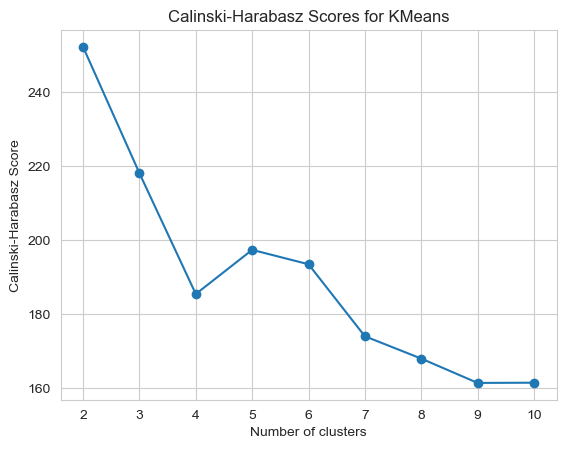

In [25]:
plt.plot(K, CHscores_kmeans, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Calinski-Harabasz Score')
plt.title('Calinski-Harabasz Scores for KMeans')
plt.show()

In [26]:
optimal_k = K[CHscores_kmeans.index(max(CHscores_kmeans))]
print(f"Optimal number of clusters (by Calinski-Harabasz): {optimal_k}")

Optimal number of clusters (by Calinski-Harabasz): 2


In [27]:
CHscores_HAC = []
K = range(2, 10)
for k in K:
    clustering = AgglomerativeClustering(n_clusters=k, linkage='ward')
    labels = clustering.fit_predict(X_scaled)
    score = calinski_harabasz_score(X_scaled, labels)
    CHscores_HAC.append(score)
    print(f"For n_clusters = {k}, Calinski-Harabasz score: {score:.2f}")


For n_clusters = 2, Calinski-Harabasz score: 203.49
For n_clusters = 3, Calinski-Harabasz score: 164.76
For n_clusters = 4, Calinski-Harabasz score: 163.82
For n_clusters = 5, Calinski-Harabasz score: 155.89
For n_clusters = 6, Calinski-Harabasz score: 148.12
For n_clusters = 7, Calinski-Harabasz score: 145.17
For n_clusters = 8, Calinski-Harabasz score: 143.23
For n_clusters = 9, Calinski-Harabasz score: 139.34


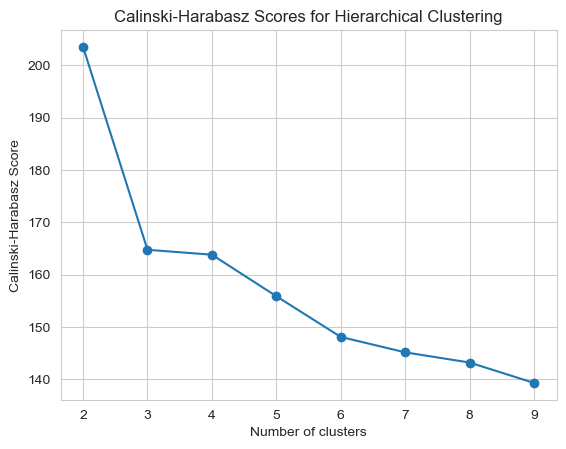

In [28]:
plt.plot(K, CHscores_HAC, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Calinski-Harabasz Score')
plt.title('Calinski-Harabasz Scores for Hierarchical Clustering')
plt.show()

In [29]:
optimal_k = K[CHscores_HAC.index(max(CHscores_HAC))]
print(f"Optimal number of clusters (by Calinski-Harabasz): {optimal_k}")

Optimal number of clusters (by Calinski-Harabasz): 2


In [30]:
clustering = AgglomerativeClustering(n_clusters= optimal_k, linkage='ward')
labels = clustering.fit_predict(X_scaled)
feats_merged['clusters'] = labels

In [31]:
supplemental_follow_train['patient_id'] = supplemental_follow_train['patient_id'].astype(str)
feats_merged['patient_id'] = feats_merged['patient_id'].astype(str)


In [32]:
supplemental_follow_train_with_clusters = supplemental_follow_train.merge(
    feats_merged[['patient_id', 'clusters']],
    on='patient_id',
    how='left'
)
supplemental_follow_train_with_clusters.head()

,visit_id,patient_id,visit_month,updrs_1,updrs_2,updrs_3,updrs_4,upd23b_clinical_state_on_medication,clusters
0,41234_0,41234,0,4.0,3.0,23.0,0.0,NaN,0
1,25924_24,25924,24,9.0,8.0,24.0,5.0,On,1
2,21526_6,21526,6,8.0,12.0,34.0,NaN,NaN,1
3,52288_6,52288,6,6.0,7.0,51.0,NaN,NaN,1
4,22087_0,22087,0,8.0,4.0,15.0,NaN,NaN,0


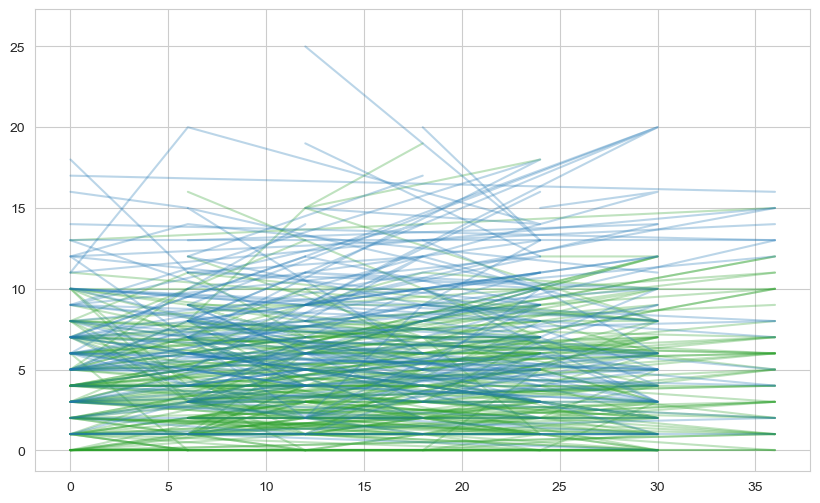

In [33]:
palette = sns.color_palette("tab10", 3)

plt.figure(figsize=(10, 6))

# Plot each patient's trajectory, colored by cluster
for cluster_id, cluster_data in supplemental_follow_train_with_clusters.groupby('clusters'):
    for pid, patient_data in cluster_data.groupby('patient_id'):
        plt.plot(
            patient_data['visit_month'],
            patient_data['updrs_1'],
            color=palette[cluster_id - 1],  # cluster labels typically start at 1
            alpha=0.3
        )

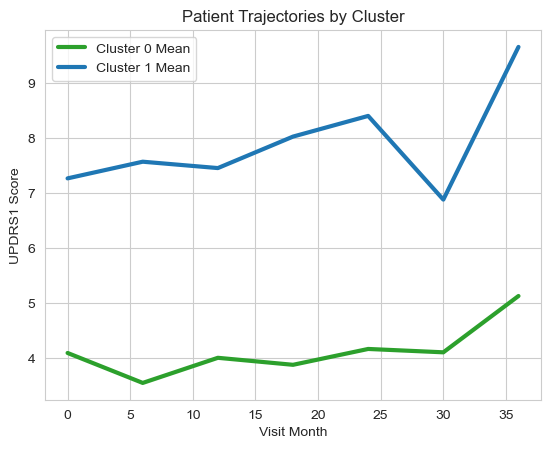

In [34]:
for cluster_id, cluster_data in supplemental_follow_train_with_clusters.groupby('clusters'):
    mean_trajectory = cluster_data.groupby('visit_month')['updrs_1'].mean()
    plt.plot(
        mean_trajectory.index,
        mean_trajectory.values,
        color=palette[cluster_id - 1],
        linewidth=3,
        label=f'Cluster {cluster_id} Mean'
    )

plt.xlabel('Visit Month')
plt.ylabel('UPDRS1 Score')
plt.title('Patient Trajectories by Cluster')
plt.legend()
plt.show()

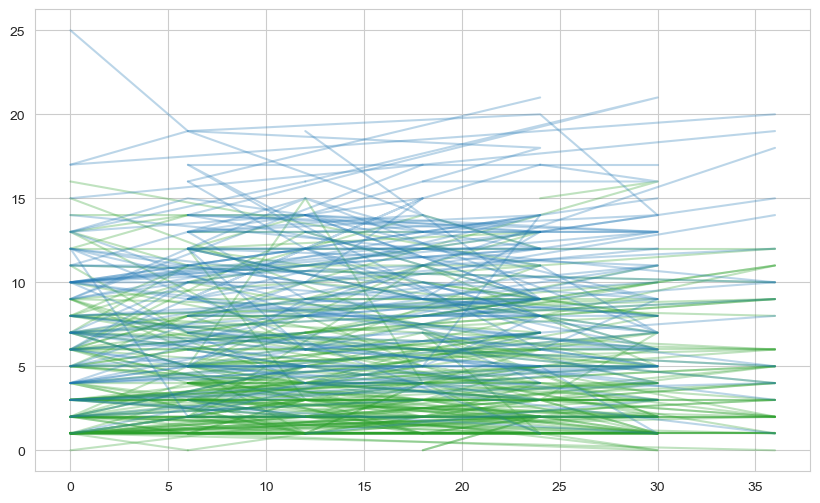

In [35]:
palette = sns.color_palette("tab10", 3)

plt.figure(figsize=(10, 6))

# Plot each patient's trajectory, colored by cluster
for cluster_id, cluster_data in supplemental_follow_train_with_clusters.groupby('clusters'):
    for pid, patient_data in cluster_data.groupby('patient_id'):
        plt.plot(
            patient_data['visit_month'],
            patient_data['updrs_2'],
            color=palette[cluster_id - 1],  # cluster labels typically start at 1
            alpha=0.3
        )

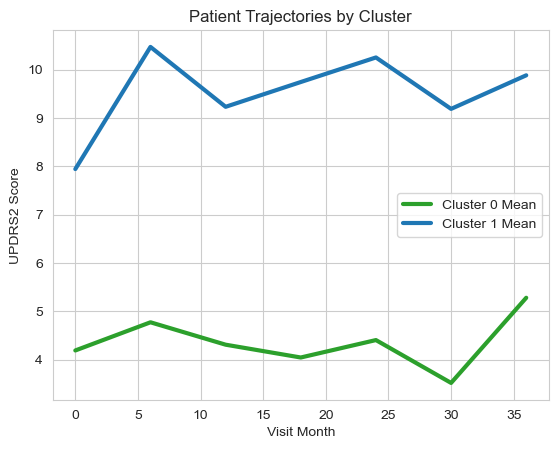

In [36]:
for cluster_id, cluster_data in supplemental_follow_train_with_clusters.groupby('clusters'):
    mean_trajectory = cluster_data.groupby('visit_month')['updrs_2'].mean()
    plt.plot(
        mean_trajectory.index,
        mean_trajectory.values,
        color=palette[cluster_id - 1],
        linewidth=3,
        label=f'Cluster {cluster_id} Mean'
    )

plt.xlabel('Visit Month')
plt.ylabel('UPDRS2 Score')
plt.title('Patient Trajectories by Cluster')
plt.legend()
plt.show()

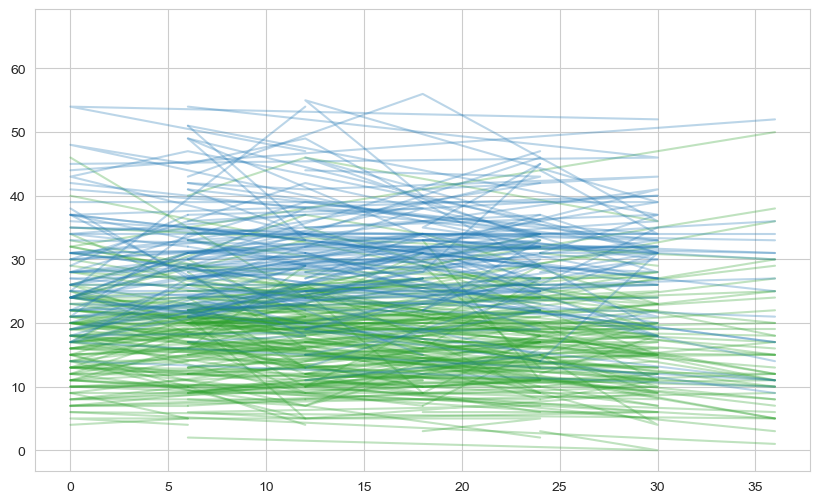

In [37]:
palette = sns.color_palette("tab10", 3)

plt.figure(figsize=(10, 6))

# Plot each patient's trajectory, colored by cluster
for cluster_id, cluster_data in supplemental_follow_train_with_clusters.groupby('clusters'):
    for pid, patient_data in cluster_data.groupby('patient_id'):
        plt.plot(
            patient_data['visit_month'],
            patient_data['updrs_3'],
            color=palette[cluster_id - 1],  # cluster labels typically start at 1
            alpha=0.3
        )

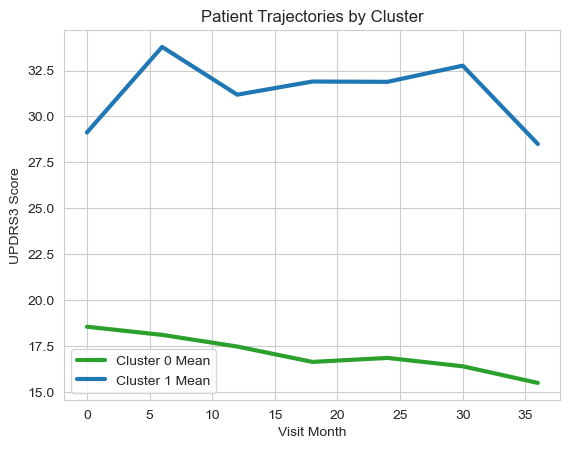

In [38]:
for cluster_id, cluster_data in supplemental_follow_train_with_clusters.groupby('clusters'):
    mean_trajectory = cluster_data.groupby('visit_month')['updrs_3'].mean()
    plt.plot(
        mean_trajectory.index,
        mean_trajectory.values,
        color=palette[cluster_id - 1],
        linewidth=3,
        label=f'Cluster {cluster_id} Mean'
    )

plt.xlabel('Visit Month')
plt.ylabel('UPDRS3 Score')
plt.title('Patient Trajectories by Cluster')
plt.legend()
plt.show()

In [39]:
lme_feats = []
lme_feats = []

for score in updrs_scores:
    
    temp = supplemental_follow_train.dropna(subset=['patient_id', 'visit_month', score])
    # Fit mixed model with random intercept only (no random slope)
    model = sml.mixedlm(f'{score} ~ visit_month', temp, groups=temp['patient_id'])
    result = model.fit()
    # Extract random intercepts (BLUPs) for each patient
    re_df = pd.DataFrame(result.random_effects).T.reset_index()
    re_df.columns = ['patient_id', f'{score}_intercept']
    lme_feats.append(re_df)
lme_feats_merged = reduce(lambda left, right: pd.merge(left, right, on='patient_id', how='inner'), lme_feats) 
print(lme_feats_merged)

    
    




    patient_id  updrs_1_intercept  updrs_2_intercept  updrs_3_intercept
0        10047          -1.467365          -3.809715           4.048495
1        10093           1.652731          -1.651344          -3.109138
2        10257          -1.467365          -3.809715          -2.804636
3        11182           2.405909           2.115226          12.736108
4         1141          -1.286894           4.664652          12.101778
..         ...                ...                ...                ...
424       8809          -2.136167          -2.265578           1.992556
425       9170          -2.136167          -2.265578           0.621929
426       9251          -4.269054          -4.133561          15.883857
427       9728          -3.363414          -3.259878          15.241641
428        994          -3.028844          -4.071522           2.136212

[429 rows x 4 columns]


In [40]:
feature_cols = [col for col in lme_feats_merged.columns if col != 'patient_id']
scaler = StandardScaler()
X_scaled1 = scaler.fit_transform(lme_feats_merged[feature_cols])

In [41]:
CHscores_HAC = []
sil_scores_HAC = []
K = range(2, 11)
for k in K:
    clustering = AgglomerativeClustering(n_clusters=k, linkage='ward')
    labels = clustering.fit_predict(X_scaled1)
    score = calinski_harabasz_score(X_scaled1, labels)
    CHscores_HAC.append(score)
    sil_scores_HAC.append(silhouette_score(X_scaled1,labels))
    print(f"For n_clusters = {k}, Calinski-Harabasz score: {score:.2f}")

For n_clusters = 2, Calinski-Harabasz score: 215.47
For n_clusters = 3, Calinski-Harabasz score: 186.93
For n_clusters = 4, Calinski-Harabasz score: 177.65
For n_clusters = 5, Calinski-Harabasz score: 164.51
For n_clusters = 6, Calinski-Harabasz score: 156.26
For n_clusters = 7, Calinski-Harabasz score: 151.68
For n_clusters = 8, Calinski-Harabasz score: 152.21
For n_clusters = 9, Calinski-Harabasz score: 152.21
For n_clusters = 10, Calinski-Harabasz score: 148.68


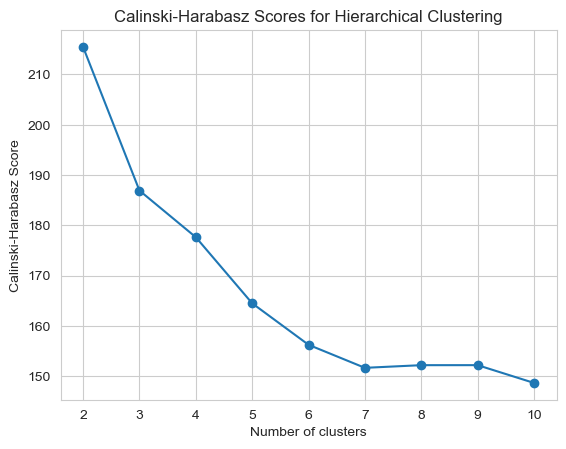

In [42]:
plt.plot(K, CHscores_HAC, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Calinski-Harabasz Score')
plt.title('Calinski-Harabasz Scores for Hierarchical Clustering')
plt.show()

In [43]:
optimal_k = K[CHscores_HAC.index(max(CHscores_HAC))]
print(f"Optimal number of clusters (by Calinski-Harabasz): {optimal_k}")

Optimal number of clusters (by Calinski-Harabasz): 2


In [44]:
clustering = AgglomerativeClustering(n_clusters= optimal_k, linkage='ward')
labels = clustering.fit_predict(X_scaled1)
lme_feats_merged['clusters'] = labels

In [45]:

lme_feats_merged['patient_id'] = feats_merged['patient_id'].astype(str)


In [46]:
supplemental_follow_train_with_clusters_lme = supplemental_follow_train.merge(
    lme_feats_merged[['patient_id', 'clusters']],
    on='patient_id',
    how='left'
)
supplemental_follow_train_with_clusters_lme.head()

,visit_id,patient_id,visit_month,updrs_1,updrs_2,updrs_3,updrs_4,upd23b_clinical_state_on_medication,clusters
0,41234_0,41234,0,4.0,3.0,23.0,0.0,NaN,1
1,25924_24,25924,24,9.0,8.0,24.0,5.0,On,0
2,21526_6,21526,6,8.0,12.0,34.0,NaN,NaN,0
3,52288_6,52288,6,6.0,7.0,51.0,NaN,NaN,0
4,22087_0,22087,0,8.0,4.0,15.0,NaN,NaN,0


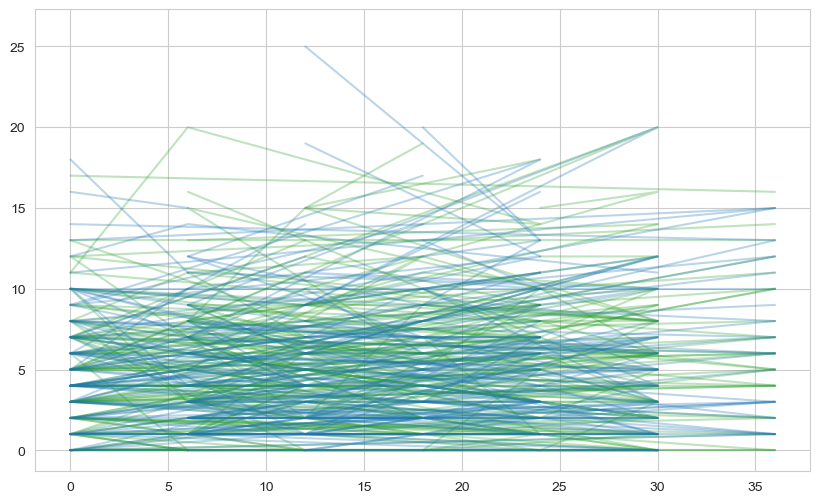

In [47]:
palette = sns.color_palette("tab10", 3)

plt.figure(figsize=(10, 6))

# Plot each patient's trajectory, colored by cluster
for cluster_id, cluster_data in supplemental_follow_train_with_clusters_lme.groupby('clusters'):
    for pid, patient_data in cluster_data.groupby('patient_id'):
        plt.plot(
            patient_data['visit_month'],
            patient_data['updrs_1'],
            color=palette[cluster_id - 1],  # cluster labels typically start at 1
            alpha=0.3
        )

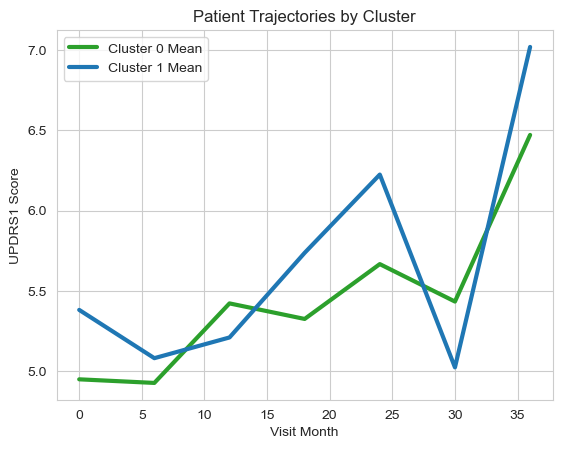

In [48]:
for cluster_id, cluster_data in supplemental_follow_train_with_clusters_lme.groupby('clusters'):
    mean_trajectory = cluster_data.groupby('visit_month')['updrs_1'].mean()
    plt.plot(
        mean_trajectory.index,
        mean_trajectory.values,
        color=palette[cluster_id - 1],
        linewidth=3,
        label=f'Cluster {cluster_id} Mean'
    )

plt.xlabel('Visit Month')
plt.ylabel('UPDRS1 Score')
plt.title('Patient Trajectories by Cluster')
plt.legend()
plt.show()

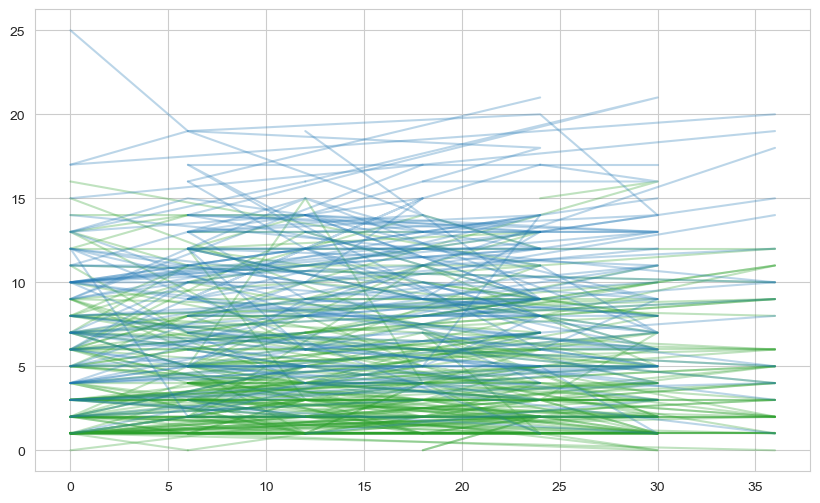

In [49]:
palette = sns.color_palette("tab10", 3)

plt.figure(figsize=(10, 6))

# Plot each patient's trajectory, colored by cluster
for cluster_id, cluster_data in supplemental_follow_train_with_clusters.groupby('clusters'):
    for pid, patient_data in cluster_data.groupby('patient_id'):
        plt.plot(
            patient_data['visit_month'],
            patient_data['updrs_2'],
            color=palette[cluster_id - 1],  # cluster labels typically start at 1
            alpha=0.3
        )

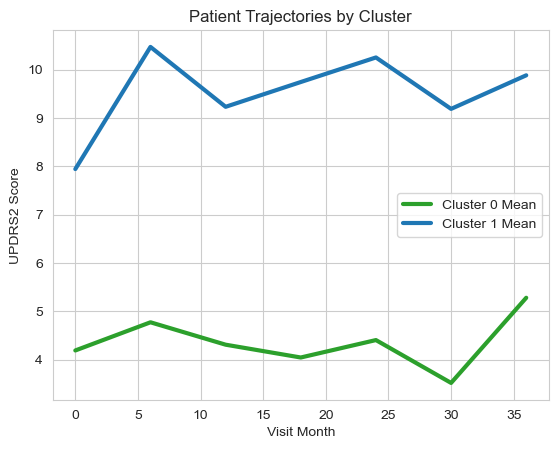

In [50]:
for cluster_id, cluster_data in supplemental_follow_train_with_clusters.groupby('clusters'):
    mean_trajectory = cluster_data.groupby('visit_month')['updrs_2'].mean()
    plt.plot(
        mean_trajectory.index,
        mean_trajectory.values,
        color=palette[cluster_id - 1],
        linewidth=3,
        label=f'Cluster {cluster_id} Mean'
    )

plt.xlabel('Visit Month')
plt.ylabel('UPDRS2 Score')
plt.title('Patient Trajectories by Cluster')
plt.legend()
plt.show()

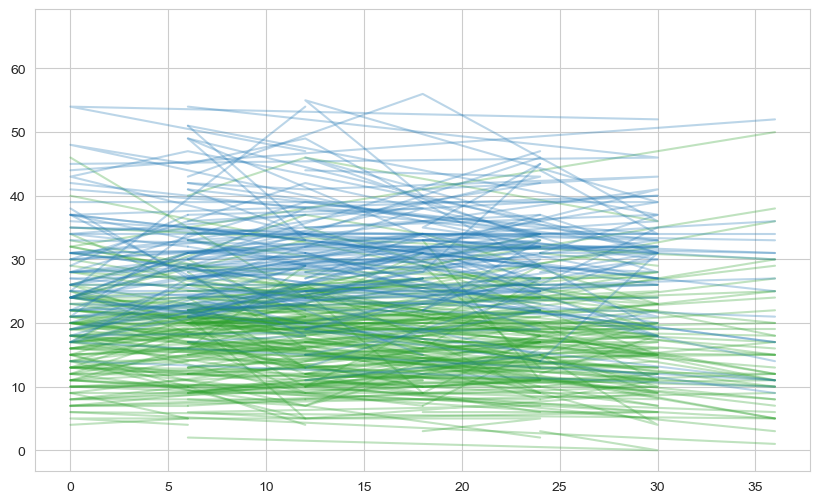

In [51]:
palette = sns.color_palette("tab10", 3)

plt.figure(figsize=(10, 6))

# Plot each patient's trajectory, colored by cluster
for cluster_id, cluster_data in supplemental_follow_train_with_clusters.groupby('clusters'):
    for pid, patient_data in cluster_data.groupby('patient_id'):
        plt.plot(
            patient_data['visit_month'],
            patient_data['updrs_3'],
            color=palette[cluster_id - 1],  # cluster labels typically start at 1
            alpha=0.3
        )

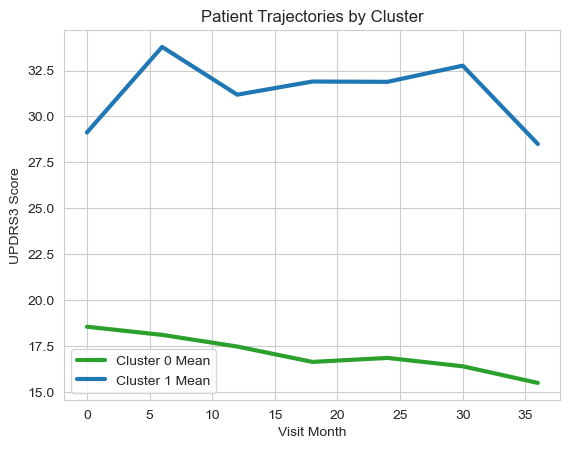

In [52]:
for cluster_id, cluster_data in supplemental_follow_train_with_clusters.groupby('clusters'):
    mean_trajectory = cluster_data.groupby('visit_month')['updrs_3'].mean()
    plt.plot(
        mean_trajectory.index,
        mean_trajectory.values,
        color=palette[cluster_id - 1],
        linewidth=3,
        label=f'Cluster {cluster_id} Mean'
    )

plt.xlabel('Visit Month')
plt.ylabel('UPDRS3 Score')
plt.title('Patient Trajectories by Cluster')
plt.legend()
plt.show()

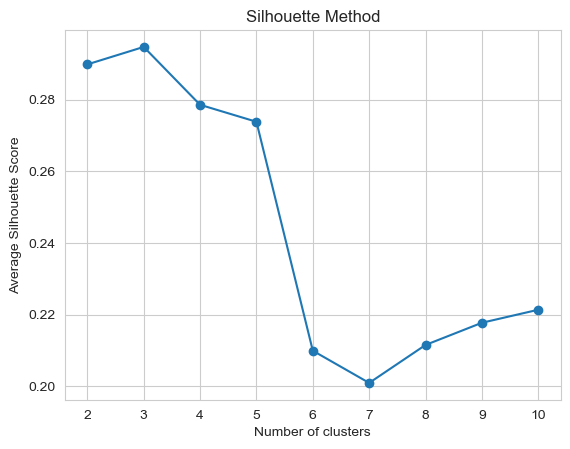

In [53]:
plt.plot(range(2, 11), sil_scores_HAC, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Average Silhouette Score')
plt.title('Silhouette Method')
plt.show()

In [54]:
CHscores_kmeans = []
sil_scores_kmeans = []
K = range(2, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=27)
    labels = kmeans.fit_predict(X_scaled1)
    score = calinski_harabasz_score(X_scaled1, labels)
    CHscores_kmeans.append(score)
    sil_scores_kmeans.append(silhouette_score(X_scaled1, labels))
    print(f"For n_clusters = {k}, Calinski-Harabasz score: {score:.2f}")

For n_clusters = 2, Calinski-Harabasz score: 253.12
For n_clusters = 3, Calinski-Harabasz score: 206.35
For n_clusters = 4, Calinski-Harabasz score: 208.11
For n_clusters = 5, Calinski-Harabasz score: 200.97
For n_clusters = 6, Calinski-Harabasz score: 187.72
For n_clusters = 7, Calinski-Harabasz score: 180.35
For n_clusters = 8, Calinski-Harabasz score: 166.45
For n_clusters = 9, Calinski-Harabasz score: 172.47


c:\Users\sayan\anaconda3new\envs\erdos_summer_2025\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\sayan\anaconda3new\envs\erdos_summer_2025\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\sayan\anaconda3new\envs\erdos_summer_2025\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\sayan\anaconda3new\envs\erdos_summer_2025\Lib\sit

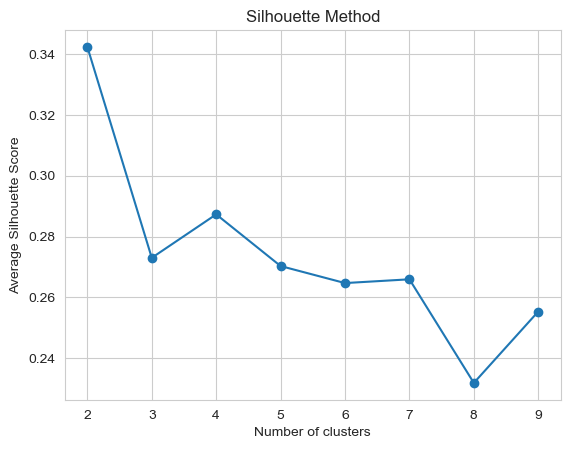

In [55]:

plt.plot(range(2, 10), sil_scores_kmeans, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Average Silhouette Score')
plt.title('Silhouette Method')
plt.show()

In [56]:
# --- CONFIG ---
min_points_required = 4  # for cubic spline
eval_points = 10         # number of evaluation points
max_visit = supplemental_follow_train['visit_month'].max()
x_eval = np.linspace(0, max_visit, eval_points)

# --- Feature Extraction ---
patients = supplemental_follow_train['patient_id'].unique()
spline_feats = []

for pid in patients:
    sub = supplemental_follow_train[supplemental_follow_train['patient_id'] == pid]
    feat_dict = {'patient_id': pid}
    valid = True

    for score in updrs_scores:
        x = sub['visit_month'].values
        y = sub[score].values

        # Filter out NaNs
        mask = ~np.isnan(y)
        x = x[mask]
        y = y[mask]

        if len(x) < min_points_required:
            valid = False
            break

        try:
            spline = UnivariateSpline(x, y, k=3, s=0)
            y_eval = spline(x_eval)
            for i, val in enumerate(y_eval):
                feat_dict[f'{score}_eval_{i}'] = val
        except Exception as e:
            print(f"Skipping patient {pid} due to spline error: {e}")
            valid = False
            break

    if valid:
        spline_feats.append(feat_dict)

# --- Construct Feature Matrix ---
spline_df = pd.DataFrame(spline_feats)
feature_cols = [col for col in spline_df.columns if col != 'patient_id']
X = spline_df[feature_cols].values

# --- Standardize ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- Hierarchical Clustering ---
Z = linkage(X_scaled, method='ward')

# --- Dendrogram Plot ---
plt.figure(figsize=(10, 6))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram (Spline Features)')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

# --- Cluster Evaluation (Calinski-Harabasz and Silhouette) ---
CHscores_HAC = []
Silhouettes = []
K = range(2, 11)

for k in K:
    labels = fcluster(Z, k, criterion='maxclust')
    ch_score = calinski_harabasz_score(X_scaled, labels)
    CHscores_HAC.append(ch_score)

    # Silhouette score only if more than 1 cluster
    sil_score = silhouette_score(X_scaled, labels) if len(set(labels)) > 1 else -1
    Silhouettes.append(sil_score)

    print(f"n_clusters = {k}, Calinski-Harabasz = {ch_score:.2f}, Silhouette = {sil_score:.2f}")

# --- Plot CH and Silhouette Scores ---
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(K, CHscores_HAC, marker='o')
plt.title('Calinski-Harabasz Score')
plt.xlabel('Number of clusters')
plt.ylabel('Score')

plt.subplot(1, 2, 2)
plt.plot(K, Silhouettes, marker='o', color='green')
plt.title('Silhouette Score')
plt.xlabel('Number of clusters')
plt.ylabel('Score')
plt.tight_layout()
plt.show()

# --- Optimal Cluster Assignment ---
optimal_k = K[CHscores_HAC.index(max(CHscores_HAC))]
print(f"Optimal number of clusters by Calinski-Harabasz: {optimal_k}")
spline_df['cluster'] = fcluster(Z, optimal_k, criterion='maxclust')




Skipping patient 25924 due to spline error: x must be strictly increasing if s = 0
Skipping patient 6317 due to spline error: x must be strictly increasing if s = 0
Skipping patient 40601 due to spline error: x must be strictly increasing if s = 0
Skipping patient 44069 due to spline error: x must be strictly increasing if s = 0
Skipping patient 34608 due to spline error: x must be strictly increasing if s = 0
Skipping patient 27179 due to spline error: x must be strictly increasing if s = 0
Skipping patient 6512 due to spline error: x must be strictly increasing if s = 0
Skipping patient 4005 due to spline error: x must be strictly increasing if s = 0
Skipping patient 40027 due to spline error: x must be strictly increasing if s = 0
Skipping patient 30059 due to spline error: x must be strictly increasing if s = 0
Skipping patient 24180 due to spline error: x must be strictly increasing if s = 0
Skipping patient 13892 due to spline error: x must be strictly increasing if s = 0
Skippin

ValueError: Found array with 0 sample(s) (shape=(0, 0)) while a minimum of 1 is required by StandardScaler.

c:\Users\sayan\anaconda3new\envs\erdos_summer_2025\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\sayan\anaconda3new\envs\erdos_summer_2025\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\sayan\anaconda3new\envs\erdos_summer_2025\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\sayan\anaconda3new\envs\erdos_summer_2025\Lib\sit

KMeans | n_clusters = 2, Calinski-Harabasz = 76.66, Silhouette = 0.27
KMeans | n_clusters = 3, Calinski-Harabasz = 62.28, Silhouette = 0.27
KMeans | n_clusters = 4, Calinski-Harabasz = 58.85, Silhouette = 0.22
KMeans | n_clusters = 5, Calinski-Harabasz = 53.81, Silhouette = 0.19


c:\Users\sayan\anaconda3new\envs\erdos_summer_2025\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\sayan\anaconda3new\envs\erdos_summer_2025\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\sayan\anaconda3new\envs\erdos_summer_2025\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\sayan\anaconda3new\envs\erdos_summer_2025\Lib\sit

KMeans | n_clusters = 6, Calinski-Harabasz = 49.05, Silhouette = 0.17
KMeans | n_clusters = 7, Calinski-Harabasz = 46.72, Silhouette = 0.18
KMeans | n_clusters = 8, Calinski-Harabasz = 42.87, Silhouette = 0.11
KMeans | n_clusters = 9, Calinski-Harabasz = 40.77, Silhouette = 0.11


c:\Users\sayan\anaconda3new\envs\erdos_summer_2025\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans | n_clusters = 10, Calinski-Harabasz = 39.20, Silhouette = 0.13


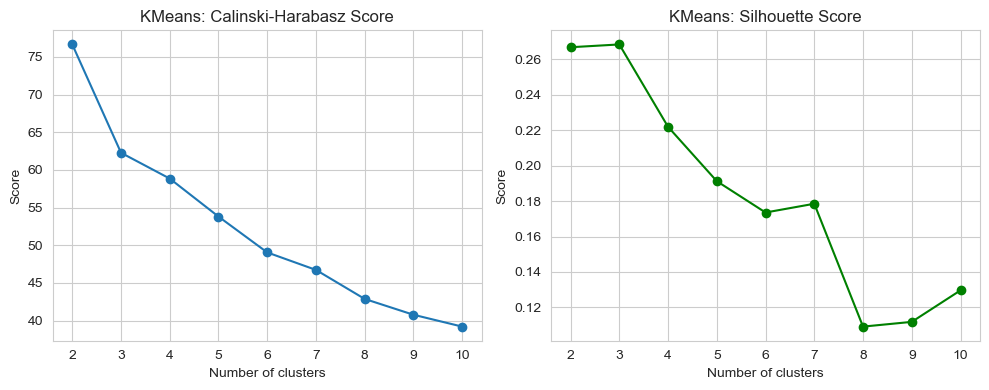

Optimal number of clusters by Calinski-Harabasz (KMeans): 2


c:\Users\sayan\anaconda3new\envs\erdos_summer_2025\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [ ]:


# --- Cluster Evaluation for KMeans ---
CHscores_KMeans = []
Silhouettes_KMeans = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)

    ch_score = calinski_harabasz_score(X_scaled, labels)
    CHscores_KMeans.append(ch_score)

    sil_score = silhouette_score(X_scaled, labels)
    Silhouettes_KMeans.append(sil_score)

    print(f"KMeans | n_clusters = {k}, Calinski-Harabasz = {ch_score:.2f}, Silhouette = {sil_score:.2f}")

# --- Plot CH and Silhouette Scores ---
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(K, CHscores_KMeans, marker='o')
plt.title('KMeans: Calinski-Harabasz Score')
plt.xlabel('Number of clusters')
plt.ylabel('Score')

plt.subplot(1, 2, 2)
plt.plot(K, Silhouettes_KMeans, marker='o', color='green')
plt.title('KMeans: Silhouette Score')
plt.xlabel('Number of clusters')
plt.ylabel('Score')
plt.tight_layout()
plt.show()

# --- Optimal Clusters Assignment ---
optimal_k_kmeans = K[CHscores_KMeans.index(max(CHscores_KMeans))]
print(f"Optimal number of clusters by Calinski-Harabasz (KMeans): {optimal_k_kmeans}")

# Final clustering and assignment
kmeans_final = KMeans(n_clusters=optimal_k_kmeans, random_state=42, n_init=10)
spline_df['cluster_kmeans'] = kmeans_final.fit_predict(X_scaled)

